My goal with this notebook is to predict popularity using various song qualities. The data comes from requests made to the Spotify API, however, I did not make these requests myself. I got this dataset from Kaggle: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data.csv")
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


Here is a copy of the descriptions of the features from the Kaggle page I got the data from:

Primary:
- id (Id of track generated by Spotify)

Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
df.isnull().values.any()

False

In [ ]:
import numpy as np

In [ ]:
df_numeric = df.select_dtypes(include=np.number)

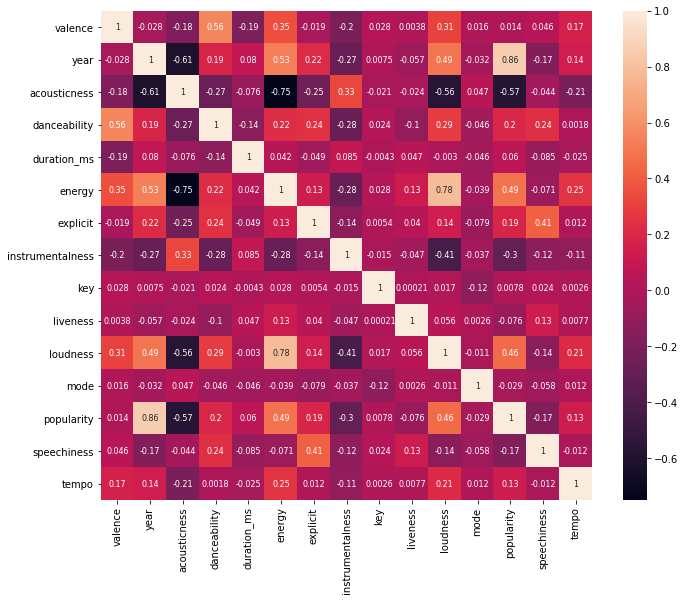

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_numeric.corr(), annot = True, annot_kws={"fontsize":8}, ax=ax)

As we can see, year and popularity are highly correlated. Accousticness also appears to have a somewhat negative correlation with popularity and energy and loudness also have somewhat of a correlation. However, energy and loudness are correlated to one another and energy and acousticness are negatively correlated so we might not want to include all of these factors in our model. I decided to plot some of these relationships below in order to get a better look at what is going on.

Text(0.5, 1.0, 'Popularity by Decade')

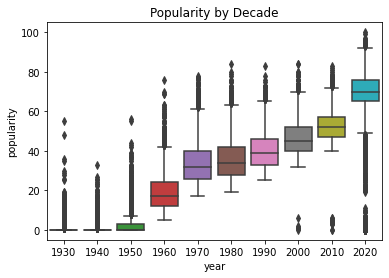

In [ ]:
sns.boxplot(x=df.loc[df['year'].isin([1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])]['year'], y=df['popularity'])
plt.title("Popularity by Decade")

Text(0.5, 1.0, 'Median Popularity by Time (Year)')

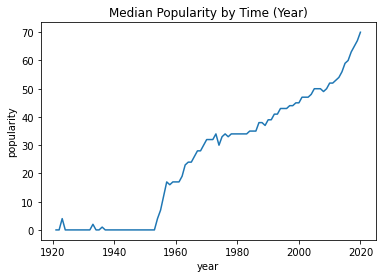

In [ ]:
plt.plot(df.groupby('year')['popularity'].median())
plt.xlabel("year")
plt.ylabel("popularity")
plt.title("Median Popularity by Time (Year)")

Text(0.5, 1.0, 'Popularity by Acousticness')

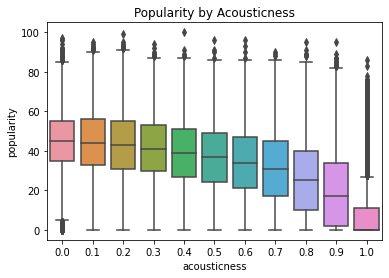

In [ ]:
sns.boxplot(x=df['acousticness'].round(1), y=df['popularity'])
plt.title("Popularity by Acousticness")

Text(0.5, 1.0, 'Popularity by Acousticness')

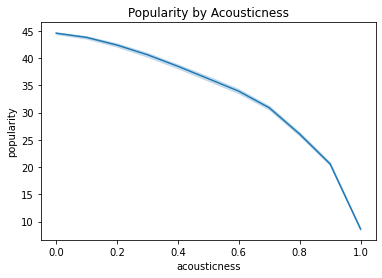

In [ ]:
sns.lineplot(x=df['acousticness'].round(1), y=df['popularity'])
plt.title("Popularity by Acousticness")

Text(0.5, 1.0, 'Popularity by Energy')

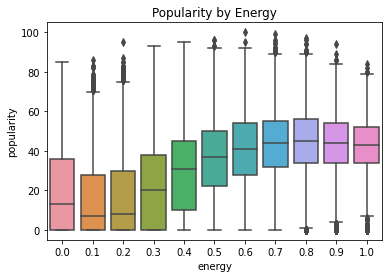

In [ ]:
sns.boxplot(x=df['energy'].round(1), y=df['popularity'])
plt.title("Popularity by Energy")

Text(0.5, 1.0, 'Popularity by Energy')

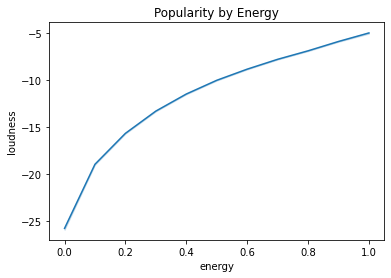

In [ ]:
sns.lineplot(x=df['energy'].round(1), y=df['loudness'].round(0))
plt.title("Popularity by Energy")

Text(0.5, 1.0, 'Popularity by Loudness')

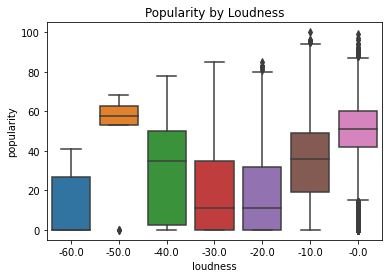

In [ ]:
sns.boxplot(x=df['loudness'].round(-1), y=df['popularity'])
plt.title("Popularity by Loudness")

Text(0.5, 1.0, 'Popularity by Explicitness')

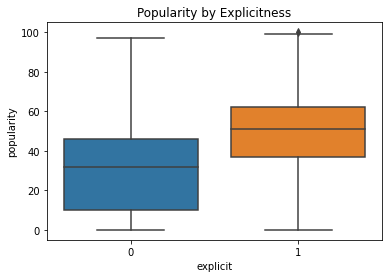

In [ ]:
sns.boxplot(x=df['explicit'], y=df['popularity'])
plt.title("Popularity by Explicitness")

These are the features I decided to select for training:




*   **Year** - I found this to be an obvious choice given the strong correlation to popularity
*   **Acousticness** - There is a good negative correlation to popularity and a good correlation to energy, which I was able to leave out by using this feature
*   **Loudness** - I chose this over loudness because it was less similar to acousticness, so I felt it could provide more unique insight to the model
*   **Instrumentalness** - Even though this doesn't really correlate with popularity all that well, it appears to be unique from the other columns, so I thought it would some new information to the models





In [ ]:
#format data for training
X = df[['year', 'acousticness', 'loudness', 'instrumentalness']]
y = df[['popularity']] #target

X.year = X.year.astype(float)
min_year = X['year'].min()
X['year'] = X['year'] - min_year + 1 #scale down year a bit

y.popularity = y.popularity.astype(float)

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              170653 non-null  float64
 1   acousticness      170653 non-null  float64
 2   loudness          170653 non-null  float64
 3   instrumentalness  170653 non-null  float64
dtypes: float64(4)
memory usage: 5.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   popularity  170653 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
None


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


I want to get cross validation scores from various regression models to see how well they perform. I will also get feature importance from XGBoost to reevaluate whether or not I made the right choices

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
scale = StandardScaler()
model = LinearRegression()
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-9.161001895802844


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
scale = StandardScaler()
model = Ridge()
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-9.16099528798019


In [ ]:
scale = StandardScaler()
model = Lasso()
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-9.192372108141456


In [ ]:
scale = StandardScaler()
model = ElasticNet()
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-10.485558200569752


In [ ]:
from xgboost import XGBRegressor

In [ ]:
scale = MinMaxScaler()
model = XGBRegressor(objective='reg:squarederror')
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-8.248591391931477


In [ ]:
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

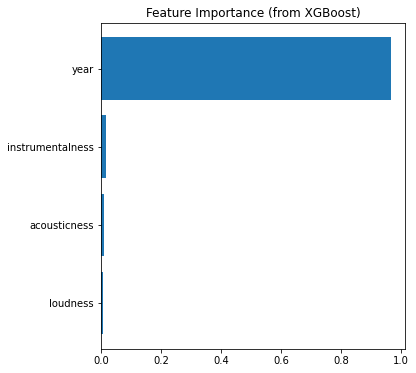

[0.9660261  0.00951804 0.00778205 0.01667377]


In [ ]:
#plot feature importance chart
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (from XGBoost)')
plt.show()
print(feature_importance)

As somewhat expected, XGBoost is almost entirely relying on year to make a prediction, which isn't really the worst thing since it isn't performing all that bad. I think I will keep the other three features going into building a neural network in case they have more of an impact there

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#scale data
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

In [ ]:
#build neural network
model = tf.keras.Sequential([
  Dense(64, input_shape=[X_train.shape[1]], activation='relu'),
  Dense(64, activation='relu'),
  Dense(1, activation='linear')                         
])


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train,y_train, epochs=3)

Epoch 1/3
4000/4000 [==============================] - 5s 1ms/step - loss: 267.2981 - mse: 267.2981 - mae: 11.2402
Epoch 2/3
4000/4000 [==============================] - 4s 1ms/step - loss: 108.7822 - mse: 108.7822 - mae: 7.4310
Epoch 3/3
4000/4000 [==============================] - 4s 1ms/step - loss: 107.3446 - mse: 107.3446 - mae: 7.3423


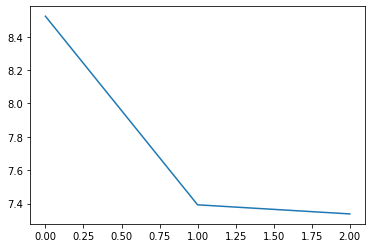

In [ ]:
plt.plot(history.history['mae'])

In [ ]:
X_train.shape

(127989, 4)

In [ ]:
y_pred = model.predict(X_test)
model.evaluate(X_test, y_test, verbose=1)

[[0.56565657 0.50200803 0.82925378 0.772     ]
 [0.55555556 0.93373494 0.67820844 0.115     ]
 [0.73737374 0.15763052 0.74216584 0.        ]
 ...
 [0.73737374 0.51706827 0.86033983 0.        ]
 [0.23232323 0.96084337 0.63564325 0.        ]
 [0.56565657 0.17771084 0.71784512 0.        ]]
1334/1334 [==============================] - 1s 803us/step - loss: 103.4549 - mse: 103.4549 - mae: 7.3128


[103.45491790771484, 103.45491790771484, 7.312796592712402]

As we can see, after just 3 epochs, a simple neural network outperforms the rest of the models by a noticable margin (off by 7 out of a range of 70 on average). This is definitely the model I would go with to make predictions.

In [ ]:
import random

In [ ]:
#take a sample of predictions from the testing data for plotting
pred_sample = []
actual_sample = []
for i in range(500): 
  index = random.randint(0, len(y_pred) - 1)
  #print("Prediction:", int(y_pred[index]), "\nActual:", int(y_test[index]),"\n")
  pred_sample.append(int(y_pred[index]))
  actual_sample.append(int(y_test[index]))

Text(0.5, 1.0, 'Sample of 500 Predicted vs. Actual Values')

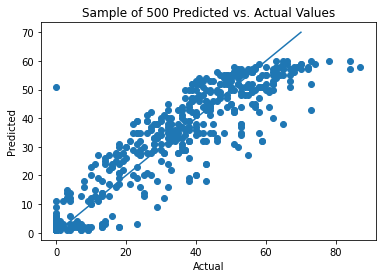

In [ ]:
#compare predictions to actual values
plt.scatter(actual_sample, pred_sample)
plt.plot(range(1,71), range(1,71))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sample of 500 Predicted vs. Actual Values")

As we can see, the predictions are generally reasonable. Sometimes, the songs are predicted to have very high popularity but actually have a popularity value close to 0. I think that this is because of how big of a role year likely plays in the model in that the model is highly incentivized to predict high values for songs made closer to today. These songs were probably made recently, but have no popularity for whatever reason. This further justifies my decision to include more than just year in my model, since otherwise, more of these errors would be likely to happen.

In [ ]:
year = 1986
acousticness = 0.5483
loudness = -14.850
instrumentalness = 0.786

year = year - min_year + 1
year = float(year)
data_for_prediction = [[year, acousticness, loudness, instrumentalness]]
data_for_prediction = scaler.transform(data_for_prediction)
print("our prediction for popularity of the song with the given feature values is:", int(round(model.predict(data_for_prediction)[0][0], 0)))

our prediction for popularity of the song with the given feature values is: 38
